<a href="https://colab.research.google.com/github/CarlosMR91/formation-evaluation/blob/main/Test_Form_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEST FORMATION EVALUATION PHYTON**

In [ ]:
# import numpy, matplotlib, and pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# install and import lasio
!pip install lasio
import lasio

In [ ]:
# cloning github repository of formation-evaluation
!git clone https://github.com/CarlosMR91/formation-evaluation

Cloning into 'formation-evaluation'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
# import all functions from formation-evaluation
import sys
sys.path.append('/content/formation-evaluation')

from well_log_display import well_log_display
from triple_combo import triple_combo
from ND_plot import ND_plot
from label_generator import label_generator

# **FUNCIONES**

In [ ]:
def calculate_klogh(formation_name, phif, vsh):
  # there is no available equation for Heather Fm. 
  if formation_name == 'hugin':
    return 10 ** (2 + (8 * phif) - (9 * vsh))
  if formation_name == 'sleipner':
    return 10 ** (-3 + (32 * phif) - (2 * vsh))
  if formation_name == 'skagerak':
    return 10 ** (-1.85 + (17.4 * phif) - (3 * vsh))

# **WELL LOG DATA**

In [ ]:
# specify file path (well 15/9-F-11A)
filepath = '/content/formation-evaluation/data/volve/well-1001.LAS'

# read with lasio
well = lasio.read(filepath)

In [ ]:
# check the available logs with .keys()
well.keys()

['DEPTH',
 'ED_AT10',
 'ED_AT60',
 'ED_AT90',
 'ED_BS',
 'ED_CALI',
 'ED_DTCO',
 'ED_GR',
 'ED_HDRA',
 'ED_NPHI',
 'ED_PEFZ',
 'ED_RHOZ',
 'EV_BVW_K',
 'EV_BVWSXO_K',
 'EV_PERM_MTZ',
 'EV_PHIE_K',
 'EV_SW_K',
 'EV_VDOLC_K',
 'EV_VLIMEC_K',
 'EV_VWCL_K',
 'FR_VP_KM',
 'FR_ZP_KM',
 'I_DRHO',
 'IND_GR',
 'IND_INV']

In [ ]:
# look for more detail with .curves
well.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="", descr="Depth", original_mnemonic="DEPTH", data.shape=(16127,)),
 CurveItem(mnemonic="ED_AT10", unit="ohm.m", value="", descr="ShalRes     (AIT-M)                 (3in)                   Array Induction Two Foot Resistivity A10", original_mnemonic="ED_AT10", data.shape=(16127,)),
 CurveItem(mnemonic="ED_AT60", unit="ohm.m", value="", descr="MedRes      (AIT-M)                 (3in)                   Array Induction Two Foot Resistivity A60", original_mnemonic="ED_AT60", data.shape=(16127,)),
 CurveItem(mnemonic="ED_AT90", unit="ohm.m", value="", descr="DeepRes     (AIT-M)                 (3in)                   Array Induction Two Foot Resistivity A90", original_mnemonic="ED_AT90", data.shape=(16127,)),
 CurveItem(mnemonic="ED_BS", unit="in", value="", descr="BitSize     (RT)    (Borehole)              (6in)                   Bit Size", original_mnemonic="ED_BS", data.shape=(16127,)),
 CurveItem(mnemonic="ED_CALI", unit="in", value="", de

In [ ]:
# see the data using .data
well.data

array([[ 416.4848,       nan,       nan, ...,       nan,       nan,
              nan],
       [ 416.6372,       nan,       nan, ...,       nan,       nan,
              nan],
       [ 416.7896,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [2873.7824,       nan,       nan, ...,       nan,       nan,
              nan],
       [2873.9348,       nan,       nan, ...,       nan,       nan,
              nan],
       [2874.0872,       nan,       nan, ...,       nan,       nan,
              nan]])

In [ ]:
# convert it to Pandas dataframe using .df() and then reset index
well = well.df().reset_index()

In [ ]:
# then show the dataframe
well.tail(8000)

,DEPTH,ED_AT10,ED_AT60,ED_AT90,ED_BS,ED_CALI,ED_DTCO,ED_GR,ED_HDRA,ED_NPHI,ED_PEFZ,ED_RHOZ,EV_BVW_K,EV_BVWSXO_K,EV_PERM_MTZ,EV_PHIE_K,EV_SW_K,EV_VDOLC_K,EV_VLIMEC_K,EV_VWCL_K,FR_VP_KM,FR_ZP_KM,I_DRHO,IND_GR,IND_INV
8127,1655.0396,3.5108,3.5491,3.2365,8.5,8.9649,99.8847,63.1927,0.0036,0.4079,4.2437,2.4942,0.0001,0.0001,NaN,0.0001,0.5833,NaN,NaN,0.9535,3.0515,7.6110,NaN,0.5124,NaN
8128,1655.1920,3.5212,3.5773,3.0913,8.5,8.9200,102.4055,54.8582,0.0054,0.3756,4.3065,2.4978,0.0001,0.0001,NaN,0.0001,0.6876,NaN,NaN,0.8469,2.9764,7.4346,NaN,0.5194,NaN
8129,1655.3444,3.0019,3.3805,2.7739,8.5,8.9200,102.2533,54.8014,-0.0003,0.4152,4.5986,2.4942,0.0001,0.0001,NaN,0.0001,0.6625,NaN,NaN,0.9795,2.9808,7.4347,NaN,0.5018,NaN
8130,1655.4968,2.9256,3.1718,2.7082,8.5,8.8975,94.8488,53.4030,-0.0089,0.4480,5.1279,2.5059,0.0001,0.0001,NaN,0.0001,1.0000,NaN,NaN,0.9999,3.2135,8.0528,NaN,0.4761,NaN
8131,1655.6492,2.7852,3.2140,2.7617,8.5,9.0099,83.6105,59.3396,-0.0121,0.4363,5.6870,2.5354,0.0001,0.0001,NaN,0.0001,1.0000,NaN,NaN,0.9999,3.6455,9.2427,NaN,0.4851,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16122,2873.4776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16123,2873.6300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16124,2873.7824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16125,2873.9348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Asociar Tops a profundidad del **registro**

In [ ]:
# specify file path
filepath = '/content/formation-evaluation/data/volve/tops-well-1001.csv'

# read with Pandas
tops = pd.read_csv(filepath)

tops

,PICKS,DEPTH
0,K-90,2446.46
1,K-100,2531.22
2,K-125,2550.53
3,K-150,2567.49
4,K-200,2593.74
5,K-250,2629.49
6,K-300,2639.14
7,K-400,2689.38
8,K-500,2777.49


In [ ]:
def label_generator(df_well, df_tops, column_depth, label_name):
  """
  Generate Formation (or other) Labels to Well Dataframe
  (useful for machine learning and EDA purpose)

  Input:

  df_well is your well dataframe (that originally doesn't have the intended label)
  df_tops is your label dataframe (this dataframe should ONLY have 2 columns)
    1st column is the label name (e.g. formation top names)
    2nd column is the depth of each label name

  column_depth is the name of depth column on your df_well dataframe
  label_name is the name of label that you want to produce (e.g. FM. LABEL)

  Output:

  df_well is your dataframe that now has the labels (e.g. FM. LABEL)
  """

  # generate list of formation depths and top names
  fm_tops = df_tops.iloc[:,0]  
  fm_depths = df_tops.iloc[:,1] 

  # create FM. LABEL column to well dataframe
  # initiate with NaNs
  df_well[label_name] = np.full(len(df_well), np.nan)  

  indexes = []
  topnames = []
  for j in range(len(fm_depths)):
    # search index at which the DEPTH in the well df equals to OR
    # larger than the DEPTH of each pick in the pick df
    if (df_well[column_depth].iloc[-1] > fm_depths[j]):
      index = df_well.index[(df_well[column_depth] >= fm_depths[j])][0]
      top = fm_tops[j]
      indexes.append(index)
      topnames.append(top)

  # replace the NaN in the LABEL column of well df
  # at the assigned TOP NAME indexes
  df_well[label_name].loc[indexes] = topnames

  # Finally, using pandas "ffill" to fill all the rows 
  # with the TOP NAMES
  df_well = df_well.fillna(method='ffill')  

  return df_well 

In [ ]:
# use "label_generator" to generate formation labels
# then show the dataframe
well = label_generator(well, tops, 'DEPTH', 'FM. LABEL')

well

,DEPTH,ED_AT10,ED_AT60,ED_AT90,ED_BS,ED_CALI,ED_DTCO,ED_GR,ED_HDRA,ED_NPHI,ED_PEFZ,ED_RHOZ,EV_BVW_K,EV_BVWSXO_K,EV_PERM_MTZ,EV_PHIE_K,EV_SW_K,EV_VDOLC_K,EV_VLIMEC_K,EV_VWCL_K,FR_VP_KM,FR_ZP_KM,I_DRHO,IND_GR,IND_INV,FM. LABEL
0,416.4848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,416.6372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,416.7896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,416.9420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,417.0944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16122,2873.4776,884.6576,616.647,494.9564,6.125,6.5097,52.9761,19.1898,0.19,0.0698,5.4206,2.7166,0.0115,0.0115,0.33,0.059,0.1955,0.3081,0.6329,0.0,5.7535,15.4536,0.1463,0.0,0.2522,K-500
16123,2873.6300,884.6576,616.647,494.9564,6.125,6.5097,52.9761,19.1898,0.19,0.0698,5.4206,2.7166,0.0115,0.0115,0.33,0.059,0.1955,0.3081,0.6329,0.0,5.7535,15.4536,0.1463,0.0,0.2522,K-500
16124,2873.7824,884.6576,616.647,494.9564,6.125,6.5097,52.9761,19.1898,0.19,0.0698,5.4206,2.7166,0.0115,0.0115,0.33,0.059,0.1955,0.3081,0.6329,0.0,5.7535,15.4536,0.1463,0.0,0.2522,K-500
16125,2873.9348,884.6576,616.647,494.9564,6.125,6.5097,52.9761,19.1898,0.19,0.0698,5.4206,2.7166,0.0115,0.0115,0.33,0.059,0.1955,0.3081,0.6329,0.0,5.7535,15.4536,0.1463,0.0,0.2522,K-500


In [ ]:
# Replace NaNs in formation label column with string called "Unknown"
well['FM. LABEL'] = well['FM. LABEL'].fillna('Unknown')

well

,DEPTH,ED_AT10,ED_AT60,ED_AT90,ED_BS,ED_CALI,ED_DTCO,ED_GR,ED_HDRA,ED_NPHI,ED_PEFZ,ED_RHOZ,EV_BVW_K,EV_BVWSXO_K,EV_PERM_MTZ,EV_PHIE_K,EV_SW_K,EV_VDOLC_K,EV_VLIMEC_K,EV_VWCL_K,FR_VP_KM,FR_ZP_KM,I_DRHO,IND_GR,IND_INV,FM. LABEL
0,416.4848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,416.6372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2,416.7896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,416.9420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,417.0944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16122,2873.4776,884.6576,616.647,494.9564,6.125,6.5097,52.9761,19.1898,0.19,0.0698,5.4206,2.7166,0.0115,0.0115,0.33,0.059,0.1955,0.3081,0.6329,0.0,5.7535,15.4536,0.1463,0.0,0.2522,K-500
16123,2873.6300,884.6576,616.647,494.9564,6.125,6.5097,52.9761,19.1898,0.19,0.0698,5.4206,2.7166,0.0115,0.0115,0.33,0.059,0.1955,0.3081,0.6329,0.0,5.7535,15.4536,0.1463,0.0,0.2522,K-500
16124,2873.7824,884.6576,616.647,494.9564,6.125,6.5097,52.9761,19.1898,0.19,0.0698,5.4206,2.7166,0.0115,0.0115,0.33,0.059,0.1955,0.3081,0.6329,0.0,5.7535,15.4536,0.1463,0.0,0.2522,K-500
16125,2873.9348,884.6576,616.647,494.9564,6.125,6.5097,52.9761,19.1898,0.19,0.0698,5.4206,2.7166,0.0115,0.0115,0.33,0.059,0.1955,0.3081,0.6329,0.0,5.7535,15.4536,0.1463,0.0,0.2522,K-500


In [ ]:
def well_log_display(df, column_depth, column_list, 
                     column_semilog=None, min_depth=None, max_depth=None, 
                     column_min=None, column_max=None, colors=None, 
                     fm_tops=None, fm_depths=None, 
                     tight_layout=1, title_size=10):
  """
  Display log side-by-side style

  Input:

  df is your dataframe
  specify min_depth and max_depth as the upper and lower depth limit
  column_depth is the column name of your depth
  column_list is the LIST of column names that you will display

  column_semilog is specific for resistivity column; if your resistivity is
    in column 3, specify as: column_semilog=2. Default is None, so if 
    you don't specify, the resistivity will be plotted in normal axis instead
    
  column_min is list of minimum values for the x-axes.
  column_max is list of maximum values for the x-axes.
  
  colors is the list of colors specified for each log names. Default is None,
    so if don't specify, the colors will be Matplotlib default (blue)

  fm_tops and fm_depths are the list of formation top names and depths.
    Default is None, so no tops are shown. Specify both lists, if you want
    to show the tops
  """
  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  import random

  if column_semilog==None:
    # column semilog not defined, RT will be plotted in normal axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        # normal axis plot
        ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])       
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)           
        ax[i].invert_yaxis()    


  else:
    # column semilog is defined, RT will be plotted in semilog axis
    logs = column_list

    # create the subplots; ncols equals the number of logs
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

    # looping each log to display in the subplots
    if colors==None:
      # color is None (default)
      for i in range(len(logs)):
        if i == 3:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth])
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])        
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)          
        ax[i].invert_yaxis()    

    else:
      # colors are defined (as list)
      for i in range(len(logs)):
        if i == 3:
          # for resistivity, semilog plot
          ax[i].semilogx(df[logs[i]], df[column_depth], color=colors[i])     
        else:
          # for non-resistivity, normal plot
          ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
        
        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')  
        if column_min!=None and column_max!=None:
          # x-axis limits defined
          ax[i].set_xlim(column_min[i], column_max[i])   
        if min_depth!=None and max_depth!=None:
          # y-axis limit defined
          ax[i].set_ylim(min_depth, max_depth)
        ax[i].invert_yaxis() 

  if fm_tops!=None and fm_depths!=None:
    # Formation tops and depths are specified, they will be shown

    # produce colors
    rgb = []
    for j in range(len(fm_tops)):
      _ = (random.random(), random.random(), random.random())
      rgb.append(_)

    for i in range(len(logs)):
      for j in range(len(fm_tops)):
        # rgb = (random.random(), random.random(), random.random())
        ax[i].axhline(y=fm_depths[j], linestyle=":", c=rgb[j], label=fm_tops[j])  
        # y = fm_depths[j] / (max_depth - min_depth)    
        # ax[i].text(0.5, y, fm_tops[j], fontsize=5, va='center', ha='center', backgroundcolor='w')

  # plt.legend()
  # plt.legend(loc='upper center', bbox_to_anchor=(-3, -0.05),
  #            fancybox=True, shadow=True, ncol=5)  
  
  plt.tight_layout(tight_layout)
  plt.show()  


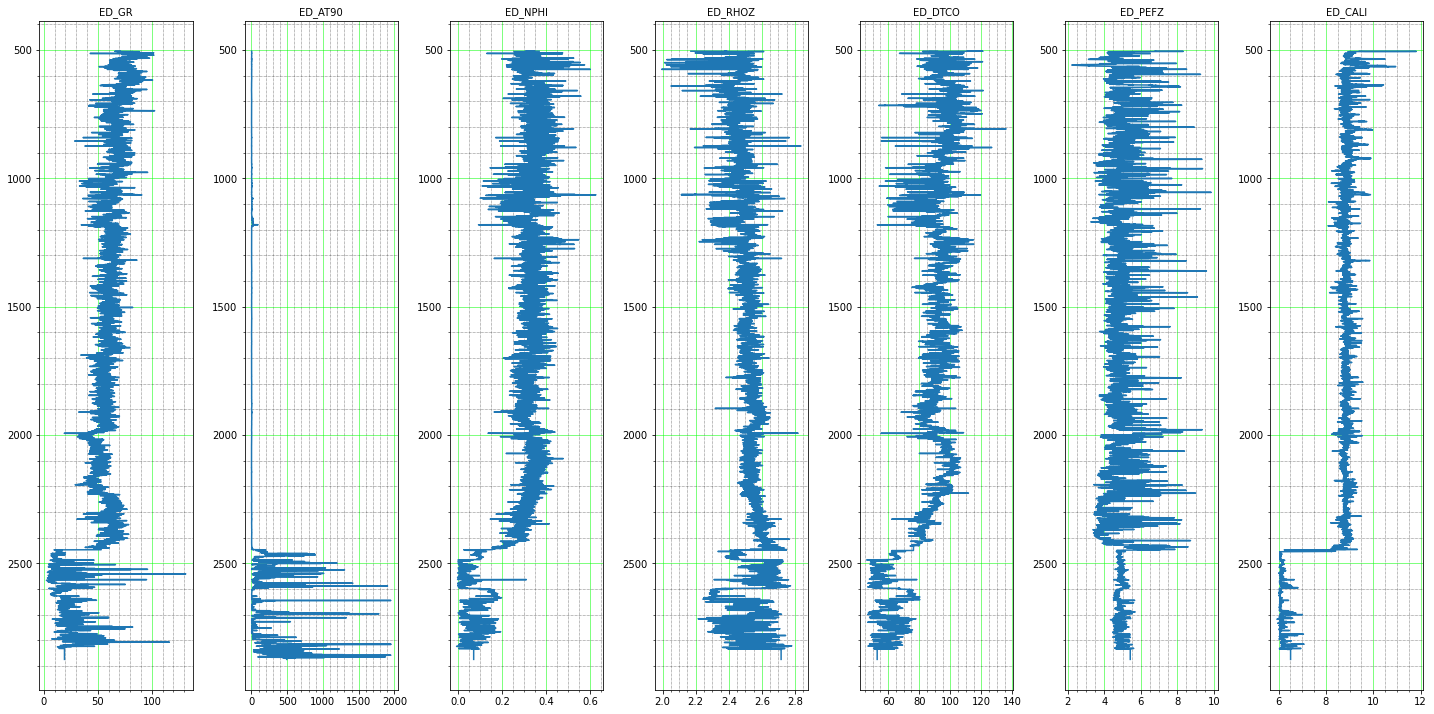

In [ ]:
# Logs we gonna visualize are: 'ED_NPHI', 'ED_RHOZ', 'ED_GR', 'ED_AT90', 'ED_PEFZ', 'ED_CALI', 'ED_DTCO' 
df_well = well
column_depth = 'DEPTH'
column_list = ['ED_GR','ED_AT90','ED_NPHI', 'ED_RHOZ','ED_DTCO', 'ED_PEFZ', 'ED_CALI']

well_log_display(df_well, column_depth, column_list)

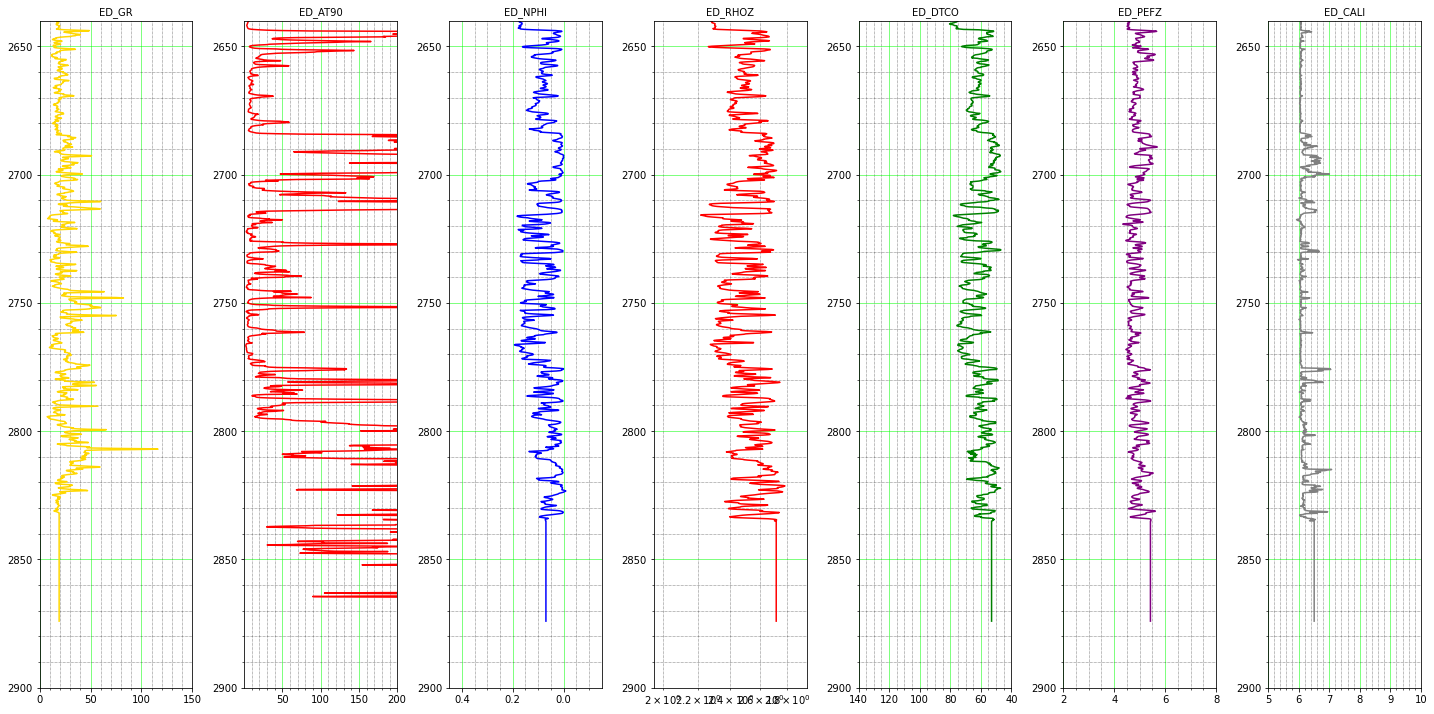

In [ ]:
# adding optional variables like "min_depth", "max_depth", etc.
column_semilog=1
min_depth=2640 
max_depth=2900

column_min=[0,0.2,0.45,1.95,140,2,5] 
column_max=[150,200,-0.15,2.95,40, 8,10] 
colors=['gold', 'red', 'blue', 'red', 'green', 'purple', 'gray']  

well_log_display(df_well, column_depth, column_list,
                 column_semilog, min_depth, max_depth,
                 column_min, column_max, colors)

In [ ]:
def triple_combo(df, column_depth, column_GR, column_resistivity, 
                 column_NPHI, column_RHOB, min_depth, max_depth, 
                 min_GR=0, max_GR=150, sand_GR_line=50,
                 min_resistivity=0.02, max_resistivity=2000, 
                 color_GR='black', color_resistivity='red', 
                 color_RHOB='red', color_NPHI='blue',
                 figsize=(6,10), tight_layout=1, 
                 title_size=15, title_height=1.05):
  """
  Producing Triple Combo log

  Input:

  df is your dataframe
  column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
  are column names that appear in your dataframe (originally from the LAS file)

  specify your depth limits; min_depth and max_depth

  input variables other than above are default. You can specify
  the values yourselves. 

  Output:

  Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)
  """
  
  import matplotlib.pyplot as plt
  from matplotlib.ticker import AutoMinorLocator  
  import numpy as np

  fig, ax=plt.subplots(1,3,figsize=(8,10))
  fig.suptitle('Triple Combo Log', size=title_size, y=title_height)

  ax[0].minorticks_on()
  ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[0].grid(which='minor', linestyle=':', linewidth='1', color='black')

  ax[1].minorticks_on()
  ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[1].grid(which='minor', linestyle=':', linewidth='1', color='black')

  ax[2].minorticks_on()
  ax[2].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  ax[2].grid(which='minor', linestyle=':', linewidth='1', color='black')  

  # First track: GR
  ax[0].get_xaxis().set_visible(False)
  ax[0].invert_yaxis()   

  gr=ax[0].twiny()
  gr.set_xlim(min_GR,max_GR)
  gr.set_xlabel('GR',color=color_GR)
  gr.set_ylim(max_depth, min_depth)
  gr.spines['top'].set_position(('outward',10))
  gr.tick_params(axis='x',colors=color_GR)
  gr.plot(df[column_GR], df[column_depth], color=color_GR)  

  gr.minorticks_on()
  gr.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  gr.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black') 

  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line>=df[column_GR]), color = 'gold', linewidth=0) # sand
  gr.fill_betweenx(df[column_depth], sand_GR_line, df[column_GR], where=(sand_GR_line<df[column_GR]), color = 'lime', linewidth=0) # shale

  # Second track: Resistivity
  ax[1].get_xaxis().set_visible(False)
  ax[1].invert_yaxis()   

  res=ax[1].twiny()
  res.set_xlim(min_resistivity,max_resistivity)
  res.set_xlabel('Resistivity',color=color_resistivity)
  res.set_ylim(max_depth, min_depth)
  res.spines['top'].set_position(('outward',10))
  res.tick_params(axis='x',colors=color_resistivity)
  res.semilogx(df[column_resistivity], df[column_depth], color=color_resistivity)    

  res.minorticks_on()
  res.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')   

  # Third track: NPHI and RHOB
  ax[2].get_xaxis().set_visible(False)
  ax[2].invert_yaxis()  

  ## NPHI curve 
  nphi=ax[2].twiny()
  nphi.set_xlim(-0.15,0.45)
  nphi.invert_xaxis()
  nphi.set_xlabel('NPHI',color='blue')
  nphi.set_ylim(max_depth, min_depth)
  nphi.spines['top'].set_position(('outward',10))
  nphi.tick_params(axis='x',colors='blue')
  nphi.plot(df[column_NPHI], df[column_depth], color=color_NPHI)

  nphi.minorticks_on()
  nphi.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  nphi.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')     

  ## RHOB curve 
  rhob=ax[2].twiny()
  rhob.set_xlim(1.95,2.95)
  rhob.set_xlabel('RHOB',color='red')
  rhob.set_ylim(max_depth, min_depth)
  rhob.spines['top'].set_position(('outward',50))
  rhob.tick_params(axis='x',colors='red')
  rhob.plot(df[column_RHOB], df[column_depth], color=color_RHOB)

  # solution to produce fill between can be found here:
  # https://stackoverflow.com/questions/57766457/how-to-plot-fill-betweenx-to-fill-the-area-between-y1-and-y2-with-different-scal
  x2p, _ = (rhob.transData + nphi.transData.inverted()).transform(np.c_[df[column_RHOB], df[column_depth]]).T
  nphi.autoscale(False)
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="orange", alpha=0.4, where=(x2p > df[column_NPHI])) # hydrocarbon
  nphi.fill_betweenx(df[column_depth], df[column_NPHI], x2p, color="blue", alpha=0.4, where=(x2p < df[column_NPHI])) # water

  res.minorticks_on()
  res.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
  res.grid(which='minor', linestyle=':', linewidth='1', color='black')

  plt.tight_layout(tight_layout)  
  plt.show() 


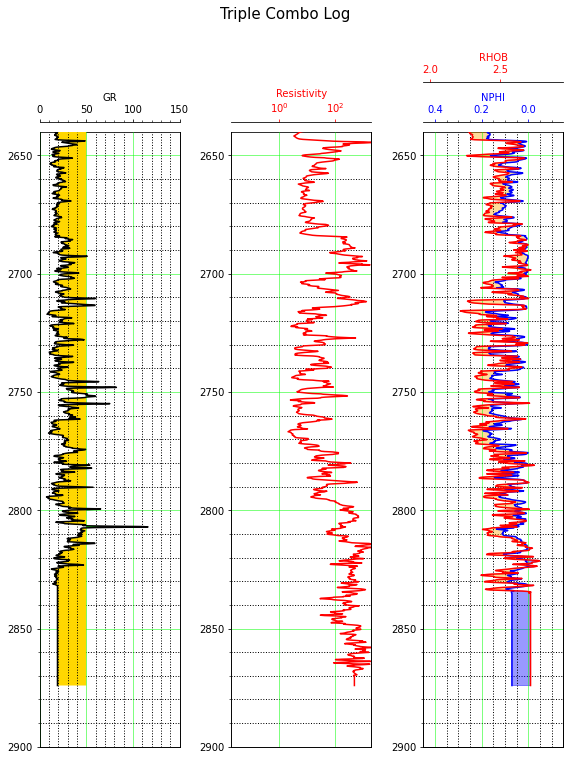

In [ ]:
# triple combo at depth from 3,580 to 3,702 m
df = well
column_depth = 'DEPTH'
column_GR = 'ED_GR'
column_resistivity = 'ED_AT90'
column_RHOB = 'ED_RHOZ'
column_NPHI = 'ED_NPHI'
min_depth = 2640
max_depth = 2900

triple_combo(df, column_depth, column_GR, column_resistivity,
             column_NPHI, column_RHOB, min_depth, max_depth)

# **NEUTRON DENSITY CROSS PLOT**

In [ ]:
def ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by,
            figsize=(7,7), scatter_size=50, scatter_alpha=0.5):  
  """
  Producing Neutron-Density (Cross)plot

  Input:

  denfl is your fluid density
  df is your dataframe
  column_nphi and column_rhob are the column name of your NPHI and RHOB
  column_hue is the column name that you want for the color of the points
    e.g. depth, vshale, formation labels, etc. 
  
  color_by depends on the column_hue that you're giving
    * if you're giving a continuous hue (numerical) like depth or vshale
      define color_by='continuous'
    * if you're giving a categorical hue (labels) like formation names
      define color_by='categorical'
  
  figsize, scatter_size, scatter_alpha are by default. You can also specify
    by yourselves.

  Output:

  3 lines. Blue is sandstone, black is limestone, red is dolomite
  Each line has dots representing porosity value from 0 to 0.5
    by increment of 0.05 
  """

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  import seaborn as sns  
  plt.style.use('seaborn')
  sns.set_theme(color_codes=True)

  lsX = np.arange(0, 0.55, 0.05)

  ssSNP = 0.222*lsX**2 + 1.021*lsX + 0.024
  dolSNP = 0.6*lsX**2 + 0.749*lsX - 0.00434

  ssCNL = 0.222*lsX**2 + 1.021*lsX + 0.039
  dolCNL = 1.40*lsX**2 + 0.389*lsX - 0.01259

  ssSnpX = np.empty((np.size(lsX),0), float)
  dolSnpX = np.empty((np.size(lsX),0), float)
  ssCnlX = np.empty((np.size(lsX),0), float)
  dolCnlX = np.empty((np.size(lsX),0), float)

  for i in np.nditer(lsX):
      ssSnpX = np.append(ssSnpX, np.roots([0.222, 1.021, 0.024 - i])[1])
      dolSnpX = np.append(dolSnpX, np.roots([0.6, 0.749, -0.00434 - i])[1])
      ssCnlX = np.append(ssCnlX, np.roots([0.222, 1.021, 0.039 - i])[1])
      dolCnlX = np.append(dolCnlX, np.roots([1.40, 0.389, -0.01259 - i])[1])

  densma_Ls = 2.71; densma_Ss = 2.65; densma_Dol = 2.87 #densma: density matrix

  denLs = (denfl - densma_Ls) * lsX + densma_Ls
  denSs = (denfl - densma_Ss) * lsX + densma_Ss
  denDol = (denfl - densma_Dol) * lsX + densma_Dol

  if color_by == 'continuous':
    # plot data with color of the continuous variable defined (depth, vsh, etc.)
    plt.figure(figsize=figsize)

    plt.scatter(df[column_nphi], df[column_rhob], c=df[column_hue],
                alpha=scatter_alpha, cmap='viridis')
    plt.colorbar()

    # plot the sand, limestone, and dolomite line (using Seaborn)
    plt.plot(ssCnlX, denSs, '.-', color='blue', markersize=10, label = 'Sandstone')
    plt.plot(lsX, denLs, '.-', color='black', markersize=10, label = 'Limestone')
    plt.plot(dolCnlX, denDol, '.-', color='red', markersize=10, label = 'Dolomite')
    
    plt.title('Neutron-Density Plot', size=20, pad=15)
    plt.xlim(-0.05, 0.45)
    plt.ylim(3, 1.9)
    plt.xlabel('NPHI (v/v)'); plt.ylabel('RHOB (g/cc)')    

  if color_by == 'categorical':
    # plot data with color of each formation names (using Seaborn)
    lm = sns.lmplot(data=df, x=column_nphi, y=column_rhob, hue=column_hue, 
                    fit_reg=False, height=figsize[0],
                    scatter_kws={'s': scatter_size, 'alpha': scatter_alpha})

    ax = lm.axes

    # plot the sand, limestone, and dolomite line (using Seaborn)
    lines = pd.DataFrame({'ssCnlX': ssCnlX, 'lsX': lsX, 'dolCnlX': dolCnlX, 
                          'denLs': denLs, 'denSs': denSs, 'denDol': denDol})

    sns.lineplot(data=lines, x='ssCnlX', y='denSs', color='blue', 
                     legend=False, marker='o', ax=ax[0,0])
    sns.lineplot(data=lines, x='lsX', y='denLs', color='black', 
                 legend=False, marker='o', ax=ax[0,0])
    sns.lineplot(data=lines, x='dolCnlX', y='denDol', color='red', 
                 legend=False, marker='o', ax=ax[0,0])   

    plt.title('Neutron-Density Plot', size=20, pad=15)
    plt.xlim(-0.05, 0.45)
    plt.ylim(3, 1.9)
    plt.xlabel('NPHI (v/v)'); plt.ylabel('RHOB (g/cc)')

    plt.show()

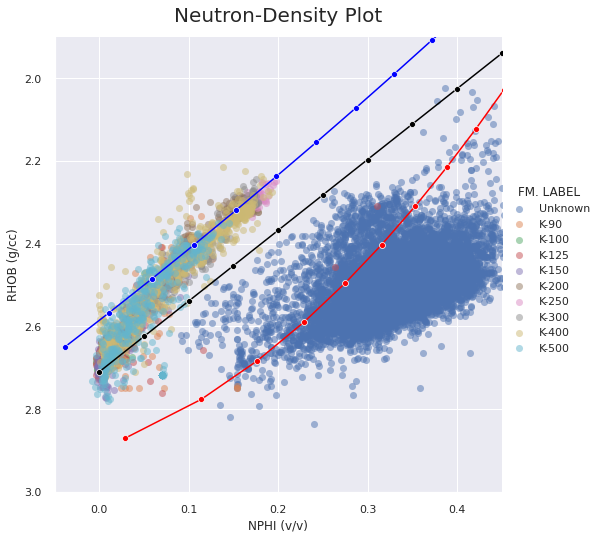

In [ ]:
# use "ND_plot" to make a plot with colors based on formation names
denfl = 1
df = well
column_nphi = 'ED_NPHI'
column_rhob = 'ED_RHOZ'
column_hue = 'FM. LABEL'
color_by = 'categorical'

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by)

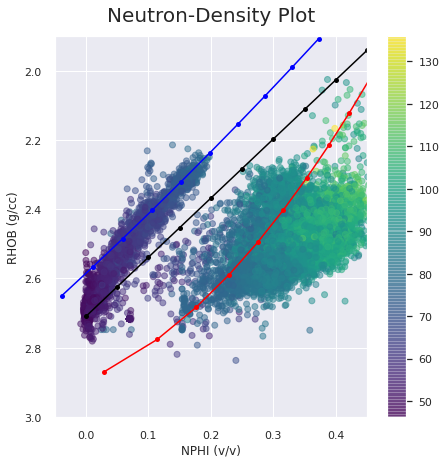

In [ ]:
# use "ND_plot" to make a plot with colors based on continuous variables
column_hue = 'ED_DTCO'
color_by = 'continuous'

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by)

# **CALCULOS PETROFISICOS**

In [ ]:
# list all formation labels using df['x'].unique()
well['FM. LABEL'].unique()

array(['Unknown', 'K-90', 'K-100', 'K-125', 'K-150', 'K-200', 'K-250',
       'K-300', 'K-400', 'K-500'], dtype=object)